In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image
import pickle

In [2]:
path = 'results/muti_LE_LED_cifer10_other/'

## load data

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
print(len(X_train))
print(len(X_test))
print(X_train.shape)

50000
10000
(50000, 32, 32, 3)


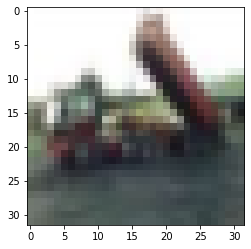

In [5]:
imgplot = plt.imshow(X_train[2])
plt.show()

## preprocessing/F.E.

## set parameter

In [6]:
n_model = 20
n_bs = n_model
epochs = 50
batch_size = 64

# imageshuffle

In [7]:
train_data = pd.DataFrame({'x':[*X_train],'y':[*Y_train]})
test_data = pd.DataFrame({'x':[*X_test],'y':[*Y_test]})
data = [train_data,test_data]

In [8]:
from moudule.BlockScramble import BlockScramble

In [9]:
for d in data:
    d['nor_x'] = d['x'].apply(lambda x:x/255)
    d['cate_y']=[*tf.keras.utils.to_categorical(d['y'])]

In [10]:
bs=[]
for i in range(n_bs):
    bs.append(BlockScramble([4, 4, 3]))
    bs[i].save(path+'key/key'+str(i)+'.pkl')
for d in data:
    for i in range(n_bs):
        d['bs'+str(i)+'_x'] = [*bs[i].Scramble(np.array(list(d['nor_x'])))]

In [11]:
data[0]

,x,y,nor_x,cate_y,bs0_x,bs1_x,bs2_x,bs3_x
0,"[[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...",[6],"[[[0.23137254901960785, 0.24313725490196078, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[[[0.12941177, 0.6862745, 0.93333334], [0.4313...","[[[0.93333334, 0.60784316, 0.8392157], [0.6313...","[[[0.83137256, 0.06666667, 0.9490196], [0.7490...","[[[0.69411767, 0.4509804, 0.99607843], [0.1176..."
1,"[[[154, 177, 187], [126, 137, 136], [105, 104,...",[9],"[[[0.6039215686274509, 0.6941176470588235, 0.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.53333336, 0.21176471, 0.78431374], [0.4, ...","[[[0.3372549, 0.42745098, 0.53333336], [0.2784...","[[[0.4117647, 0.654902, 0.5372549], [0.9764706...","[[[0.84705883, 0.96862745, 0.33333334], [0.215..."
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",[9],"[[[1.0, 1.0, 1.0], [0.9921568627450981, 0.9921...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[1.0, 0.8156863, 0.0627451], [0.0, 0.9411765...","[[[0.0, 0.0, 0.05882353], [1.0, 0.18431373, 0....","[[[0.12156863, 1.0, 0.050980393], [0.0, 0.0588...","[[[0.05882353, 0.9372549, 0.0], [0.8784314, 0...."
3,"[[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...",[4],"[[[0.10980392156862745, 0.09803921568627451, 0...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.21176471, 0.49411765, 0.42352942], [0.368...","[[[0.99607843, 0.105882354, 0.827451], [0.8901...","[[[0.42745098, 0.011764706, 0.9647059], [0.2, ...","[[[0.69803923, 0.4509804, 0.11764706], [0.6156..."
4,"[[[170, 180, 198], [168, 178, 196], [177, 185,...",[1],"[[[0.6666666666666666, 0.7058823529411765, 0.7...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.3764706, 0.20392157, 0.9019608], [0.34117...","[[[0.2784314, 0.7294118, 0.32941177], [0.85098...","[[[0.6509804, 0.7882353, 0.19215687], [0.65490...","[[[0.6627451, 0.78431374, 0.39215687], [0.0862..."
...,...,...,...,...,...,...,...,...
49995,"[[[145, 161, 194], [151, 166, 199], [156, 171,...",[2],"[[[0.5686274509803921, 0.6313725490196078, 0.7...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.6039216, 0.70980394, 0.95686275], [0.2, 0...","[[[0.13333334, 0.39607844, 0.4117647], [0.9843...","[[[0.7921569, 0.79607844, 0.23529412], [0.3882...","[[[0.34901962, 0.2901961, 0.14509805], [0.0235..."
49996,"[[[255, 245, 132], [254, 247, 134], [255, 249,...",[6],"[[[1.0, 0.9607843137254902, 0.5176470588235295...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[[[0.99215686, 0.627451, 0.0], [0.03137255, 0....","[[[0.46666667, 0.18431373, 0.05882353], [0.937...","[[[0.2627451, 0.56078434, 0.49803922], [0.7137...","[[[1.0, 0.6862745, 0.627451], [0.9411765, 0.94..."
49997,"[[[35, 178, 235], [40, 176, 239], [42, 176, 24...",[9],"[[[0.13725490196078433, 0.6980392156862745, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.5764706, 0.95686275, 0.6392157], [0.31372...","[[[0.06666667, 0.78431374, 0.8352941], [0.1098...","[[[0.7921569, 0.9254902, 0.039215688], [0.6235...","[[[0.5176471, 0.95686275, 0.32941177], [0.3490..."
49998,"[[[189, 211, 240], [186, 208, 236], [185, 207,...",[1],"[[[0.7411764705882353, 0.8274509803921568, 0.9...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.8980392, 0.7019608, 0.19607843], [0.50196...","[[[0.003921569, 0.9098039, 0.3019608], [0.9921...","[[[0.56078434, 0.92941177, 0.09803922], [0.831...","[[[0.54901963, 0.9882353, 0.19607843], [0.7607..."


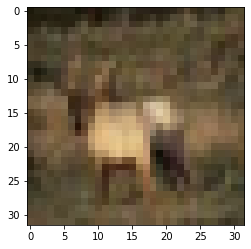

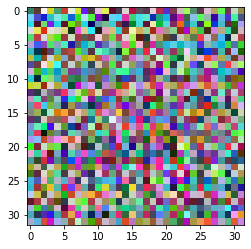

In [12]:
plt.imshow(data[0]['x'][i])
plt.show()
plt.imshow(data[0]['bs0_x'][i])
plt.show()

## Training

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Input,\
                                    Lambda,MaxPooling2D, GlobalAveragePooling2D,\
                                    Add, Concatenate,BatchNormalization
from tensorflow.keras.models import Model

from moudule.padding import PaddingReplicate2D
from moudule.pixelshuffle import PixelShuffle
from moudule.pixelshuffle import PixelShuffle_calc, PixelShuffle_shape

from keras.metrics import categorical_accuracy
from tensorflow.keras.callbacks import CSVLogger

In [14]:
def resnet2(input_shape, nb_classes=10):
    p1 = PaddingReplicate2D((1,1))
    inp = Input(shape=input_shape)
    x = inp

    # block0 ####################################################
    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (4,4), padding='valid', strides=(4,4), kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48
    
    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48

    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48

    x = BatchNormalization() (x)
    x = Conv2D( 4*4*32, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = PixelShuffle( x, 4 )
    # 32x32x32
    
    x = Conv2D( 64, (3,3), padding='same', kernel_initializer='he_normal' ) (x)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = Conv2D( 128, (3,3), padding='same', kernel_initializer='he_normal' ) (x)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = MaxPooling2D(pool_size=(2, 2)) (x)
    x = Conv2D( 128, (3,3), padding='same', kernel_initializer='he_normal' ) (x)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = Conv2D( 128, (3,3), padding='same', kernel_initializer='he_normal' ) (x)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal' ) (x)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = MaxPooling2D(pool_size=(2, 2)) (x)
    x = Conv2D( 512, (3,3), padding='same', kernel_initializer='he_normal' ) (x)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = MaxPooling2D(pool_size=(2, 2)) (x)
    x = Conv2D( 512, (3,3), padding='same', kernel_initializer='he_normal' ) (x)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = Conv2D( 512, (3,3), padding='same', kernel_initializer='he_normal' ) (x)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = Flatten()(x)
    x = Dense(512)(x)
    x = Activation('relu') (x)
    x = Dropout(0.25) (x)
    x = Dense(100)(x)
    x = Activation('softmax') (x)
    
    return Model(inputs=inp, outputs=x)

In [19]:
model =[]
for i in  range(n_model):
    model.append(resnet2(input_shape=[32,32,3], nb_classes=10))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model[i].summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_32 (BatchN  (None, 32, 32, 3)   12          ['input_3[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_36 (Conv2D)             (None, 8, 8, 48)     2352        ['batch_normalization_32[0][0]'] 
                                                                                                  
 activation_32 (Activation)     (None, 8, 8, 48)     0           ['conv2d_36[0][0]']        

 ormalization)                                                   0]']                             
                                                                                                  
 activation_37 (Activation)     (None, 32, 32, 48)   0           ['batch_normalization_38[0][0]'] 
                                                                                                  
 conv2d_42 (Conv2D)             (None, 32, 32, 64)   27712       ['padding_replicate2d_2[2][0]']  
                                                                                                  
 batch_normalization_39 (BatchN  (None, 32, 32, 64)  256         ['conv2d_42[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_38 (Activation)     (None, 32, 32, 64)   0           ['batch_normalization_39[0][0]'] 
          

                                                                                                  
 tf.__operators__.getitem_37 (S  (None, 16, 16, 32)  0           ['dropout_19[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 concatenate_15 (Concatenate)   (None, 16, 16, 128)  0           ['add_15[0][0]',                 
                                                                  'tf.__operators__.getitem_37[0][
                                                                 0]']                             
                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  (None, 8, 8, 128)   0           ['concatenate_15[0][0]']         
                                                                                                  
 batch_nor

 activation_47 (Activation)     (None, 10)           0           ['global_average_pooling2d_2[0][0
                                                                 ]']                              
                                                                                                  
Total params: 2,256,902
Trainable params: 2,253,920
Non-trainable params: 2,982
__________________________________________________________________________________________________
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_48 (BatchN  (None, 32, 32, 3)   12          ['input_4[0][0]']                
 ormalizatio

                                                                 0]']                             
                                                                                                  
 tf.__operators__.getitem_45 (S  (None, 32, 32, 48)  0           ['concatenate_18[0][0]']         
 licingOpLambda)                                                                                  
                                                                                                  
 batch_normalization_54 (BatchN  (None, 32, 32, 48)  192         ['tf.__operators__.getitem_45[0][
 ormalization)                                                   0]']                             
                                                                                                  
 activation_53 (Activation)     (None, 32, 32, 48)   0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_60

 tf.__operators__.getitem_50 (S  (None, 16, 16, 96)  0           ['dropout_27[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 add_21 (Add)                   (None, 16, 16, 96)   0           ['concatenate_20[0][0]',         
                                                                  'tf.__operators__.getitem_50[0][
                                                                 0]']                             
                                                                                                  
 tf.__operators__.getitem_51 (S  (None, 16, 16, 32)  0           ['dropout_27[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 concatena

                                                                                                  
 dropout_31 (Dropout)           (None, 4, 4, 512)    0           ['conv2d_70[0][0]']              
                                                                                                  
 conv2d_71 (Conv2D)             (None, 4, 4, 10)     5130        ['dropout_31[0][0]']             
                                                                                                  
 global_average_pooling2d_3 (Gl  (None, 10)          0           ['conv2d_71[0][0]']              
 obalAveragePooling2D)                                                                            
                                                                                                  
 activation_63 (Activation)     (None, 10)           0           ['global_average_pooling2d_3[0][0
                                                                 ]']                              
          

In [20]:
train_y =np.array([[*a]for a in data[0]['cate_y']])
test_y =np.array([[*a]for a in data[1]['cate_y']])

782/782 [==============================] - 120s 150ms/step - loss: 1.6984 - accuracy: 0.3743 - val_loss: 3.1741 - val_accuracy: 0.2628


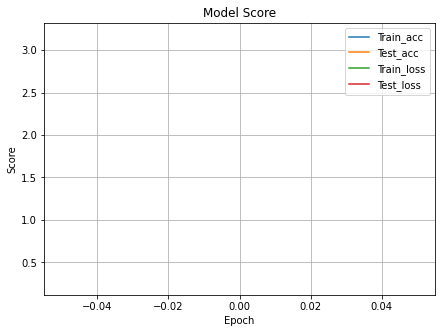

782/782 [==============================] - 125s 154ms/step - loss: 1.8156 - accuracy: 0.3616 - val_loss: 2.9485 - val_accuracy: 0.3141


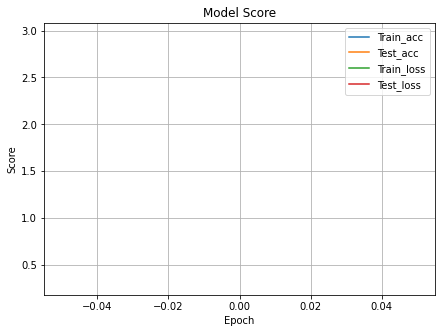

In [21]:
for i in  range(n_model):
    csv_logger = CSVLogger(path+'log/log'+str(i)+'.csv', append=True, separator=';')

    data[0]['train_x'+str(i)] = data[0].apply(lambda row: row['bs'+str(i*2)+'_x'] if row['y']<5 else row['bs'+str(i*2+1)+'_x'], axis=1)
    data[1]['test_x'+str(i)] = data[1].apply(lambda row: row['bs'+str(i*2)+'_x'] if row['y']<5 else row['bs'+str(i*2+1)+'_x'], axis=1) 
    train_x =np.array([[*a]for a in data[0]['train_x'+str(i)]])
    test_x =np.array([[*a]for a in data[1]['test_x'+str(i)]])

    his = model[i].fit(train_x, 
                train_y, 
                epochs=epochs, 
                batch_size=batch_size, 
                verbose=1,
                validation_data=(test_x, test_y),
                callbacks=[csv_logger]
                )
    
    model[i].save(path+'model/model'+str(i)+'.h5')
    with open(path+'his/his'+str(i)+'.pkl', 'wb') as fp:
        pickle.dump(his.history, fp)
    
    fig, ax = plt.subplots(figsize=(7, 5), sharex=True)
    plt.plot(his.history["accuracy"])
    plt.plot(his.history["val_accuracy"])
    plt.plot(his.history["loss"])
    plt.plot(his.history['val_loss'])
    plt.title("Model Score")
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    # ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
    plt.legend(["Train_acc", "Test_acc","Train_loss", "Test_loss"], loc="upper right")
    plt.grid()
    plt.savefig(path+"loss/loss"+str(i)+".png",dpi=1000)
    plt.show()

In [22]:
result = pd.DataFrame({"True_value":data[1]['y']})

In [23]:
for i in range(n_model):
    test_x =np.array([[*a]for a in data[1]['test_x'+str(i)]])
    pred_y = model[i].predict( test_x )
    result['model'+str(i)] = [*pred_y]
    acc = categorical_accuracy( test_y, pred_y )
    np.mean(acc)

In [24]:
result.to_pickle(path+'pre_test_result.pkl')

In [28]:
result

,True_value,model0,model1
0,[3],"[0.027530978, 0.17956066, 0.24563569, 0.282091...","[0.14012851, 0.051416278, 0.16486943, 0.159680..."
1,[8],"[0.016069934, 0.05359903, 0.030627154, 0.00479...","[4.9739388e-08, 3.584856e-08, 2.4643125e-08, 3..."
2,[8],"[0.09213535, 0.06567299, 0.08753797, 0.0023282...","[3.6470947e-08, 1.140785e-08, 2.2581103e-08, 2..."
3,[0],"[0.114447296, 0.8686906, 0.0059090923, 0.00620...","[0.053420436, 0.01707753, 0.008316048, 0.01099..."
4,[6],"[0.1301355, 0.45784357, 0.14015393, 0.17192237...","[2.0299342e-09, 4.030626e-10, 8.5349516e-10, 9..."
...,...,...,...
9995,[8],"[0.08829305, 0.23020707, 0.10221032, 0.0526820...","[9.201366e-08, 3.01954e-08, 9.320907e-08, 1.19..."
9996,[3],"[0.0075760214, 0.02789891, 0.18476465, 0.42196...","[0.011605585, 0.0074449168, 0.02287646, 0.0147..."
9997,[5],"[0.09072006, 0.26393512, 0.18125767, 0.1819628...","[5.173014e-09, 6.768795e-09, 3.3531746e-09, 4...."
9998,[1],"[0.030258492, 0.13737245, 0.20068464, 0.219106...","[0.0016985489, 0.0007550288, 0.0021335403, 0.0..."


In [29]:
for i in range(n_model):
    result['model'+str(i)+'_pre_val'] = result['model'+str(i)].apply(lambda x : np.argmax(x))

In [32]:
from scipy import stats
acc_m = tf.keras.metrics.Accuracy()

In [33]:
n_vote = 10
vote_predict = result.apply(lambda row: stats.mode(row[n_model+1:n_model+1+n_vote])[0][0], axis=1)
acc_m.update_state([*result['True_value']], vote_predict)
print(acc_m.result().numpy())

0.2851


In [35]:
n_vote = 10
vote_predict = result.apply(lambda row: [sum(i) for i in zip(*row[1:1+n_vote])], axis=1)
acc = categorical_accuracy(test_y,vote_predict.tolist())
np.mean(acc)

0.3958